## Lesson 8

Quick links:
[8.1 - Example on Birth Weight and Smoking](#example-on-birth-weight-and-smoking)
[8.2 - The Basics](#the-basics)
[8.3 - Two Separate Advantages](#two-separate-advantages)
[8.4 - Coding Quanlitative Variables](#coding-qualitative-variables)
[8.5 - Additive Effects](#additive-effects)
[8.6 - ](#)
[8.7 - ](#)
[8.8 - ](#)
[8.9 - ](#)
[8.10 - Summary](#summary)

Reference:
[Online Note Lesson 8](https://online.stat.psu.edu/stat501/lesson/8/)
[ML graph with Plotly](https://plotly.com/python/ml-regression/)

In [56]:
import os
import warnings

import lmdiag
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from utils.config import data_path

pio.templates.default = 'simple_white'
warnings.filterwarnings("ignore")

In [57]:
# pipeline
def simple_ols(df, x , y):
    reg = smf.ols(formula=f'{y} ~ {x}', data=df).fit()
    print('ANOVA')
    print('='*78)
    print(anova_lm(reg))
    print('='*78)
    print(reg.summary())
    return reg

### Example on Birth Weight and Smoking

The data on in this repo is fixed. So use this one if you see the error "'utf-8' codec can't decode byte 0xff in position 0: invalid start byte"


In [58]:
# birth and smokers dataset
df = pd.read_csv(os.path.join(data_path, 'birthsmokers.txt'), delimiter='\t')
df.head()
# matrix plot
fig = px.scatter_matrix(df, width=600, height=400, title='Matrix Plot of Wgt, Gest, Smoke')
fig.show()

Since pandas/python is not that smart, they cannot figure out that smoke is a categorical variable yet.
Below is when it is a seen as continuous. After that we manually say "Smoke" is a categorical.

In [59]:
# scatter with continuous Smoke
fig = px.scatter(df, x='Gest', y='Wgt', color='Smoke', trendline='ols', width=600, height=400)
fig.show()

In [60]:
# scatter with categorical Smoke
df['Smoke'] = df['Smoke'].astype('category')
fig = px.scatter(df, x='Gest', y='Wgt', color='Smoke', trendline='ols', width=600, height=400, color_discrete_map={'1':'red', '0':'blue'})
fig.update_traces(marker={'symbol': 'circle-open'})
fig.show()

In [61]:
# MLR needs the plus formula
reg = simple_ols(df, x='Gest + Smoke', y='Wgt')

ANOVA
            df        sum_sq       mean_sq           F        PR(>F)
Smoke      1.0  6.845000e+04  6.845000e+04    5.128403  3.118790e-02
Gest       1.0  3.280270e+06  3.280270e+06  245.763978  1.070123e-15
Residual  29.0  3.870698e+05  1.334724e+04         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           5.29e-15
Time:                        23:20:31   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covaria

# The Basics

# Two Separate Advantage

# Coding Qualitative Variables

There are multiple ways to code a dummy variable from a categorical column. Below I will demonstrate two most straight forward methods through Salary dataset.
1. Using list comprehension
2. Using pandas

No matter the methods, remember to choose/exclude 1 category as the reference.

In [62]:
# salary dataset
df = pd.read_csv(os.path.join(data_path, 'Salary.csv'), usecols=['Salary', 'YrsExp', 'Degree'])
df.head()

,Salary,YrsExp,Degree
0,58.8,4.49,PhD
1,34.8,2.92,Bachelor
2,70.0,9.92,PhD
3,55.5,0.14,PhD
4,85.0,15.96,Masters


In [63]:
# Using list comprehension
df['phd'] = [1 if deg == 'PhD' else 0 for deg in df['Degree']]
df['master'] = [1 if deg == 'Masters' else 0 for deg in df['Degree']]
df.head()

,Salary,YrsExp,Degree,phd,master
0,58.8,4.49,PhD,1,0
1,34.8,2.92,Bachelor,0,0
2,70.0,9.92,PhD,1,0
3,55.5,0.14,PhD,1,0
4,85.0,15.96,Masters,0,1


In [64]:
# Using pandas
df.drop('phd', axis=1, inplace=True)
df.drop('master', axis=1, inplace=True)
pd.concat([df, pd.get_dummies(df['Degree'])], axis=1).head()

,Salary,YrsExp,Degree,Bachelor,Masters,PhD
0,58.8,4.49,PhD,0,0,1
1,34.8,2.92,Bachelor,1,0,0
2,70.0,9.92,PhD,0,0,1
3,55.5,0.14,PhD,0,0,1
4,85.0,15.96,Masters,0,1,0


# Additive Effects

When two predictors do not interact, we say that each predictor has an "additive effect" on the response.

# Interaction Effects

The regression line here is not parallel which mean they have interaction effects.

In [65]:
# depression data
df = pd.read_csv(os.path.join(data_path, 'depression.txt'), delimiter='\t')

# scatter plot
fig = px.scatter(df, x='age', y='y', color='TRT', symbol='TRT', width=600, height=400,
                 title='Scatterplot of y vs age', trendline='ols')
fig.update_traces(marker={'size': 8}, patch={'line': {'dash': 'solid'}}, selector={'legendgroup': 'A'})
fig.update_traces(marker={'size': 8}, patch={'line': {'dash': 'dot'}}, selector={'legendgroup': 'B'})
fig.update_traces(marker={'size': 8}, patch={'line': {'dash': 'dash'}}, selector={'legendgroup': 'C'})
fig.show()

Two predictors interact when:
1. the effect on the response variable of one depends on the value of the other.
2. A slope parameter can no longer be interpreted as the change in the mean response for each unit increase in the predictor, while the other predictors are held constant.

Fitting interact variable is straight forward: just multiple the terms!

In [66]:
# peek at the data
print(df.head())
print('='*78)

# interaction regression
reg = simple_ols(df, x='age + x2 + x3 + age*x2 + age*x3', y='y')

    y  age  x2  x3 TRT
0  56   21   1   0   A
1  41   23   0   1   B
2  40   30   0   1   B
3  28   19   0   0   C
4  55   28   1   0   A
ANOVA
            df       sum_sq      mean_sq           F        PR(>F)
age        1.0  3424.431786  3424.431786  222.294615  2.058902e-15
x2         1.0   803.804498   803.804498   52.178412  4.856763e-08
x3         1.0     1.189004     1.189004    0.077183  7.830570e-01
age:x2     1.0   375.002499   375.002499   24.343027  2.807848e-05
age:x3     1.0   328.424475   328.424475   21.319447  6.849515e-05
Residual  30.0   462.147738    15.404925         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           4

Lets try interpret this regression:
- If the patient recieves A, (x2=1 and x3=0) => y = 47.5156 + 0.3305*age
- If the patient recieves B, (x2=0 and x3=1) => y = 28.9182 + 0.5237*age
- If the patient recieves C, (x2=0 and x3=0) => y = 6.2114 + 1.0334*age

For diagnostic plots, there are many ways to implement them. My prefer choice is to create a custom function and go from there.
However, it takes time and not applicable everywhere. Thus, I will use this package for diagnostic

[lmdiag packge from dynobo](https://github.com/dynobo/lmdiag)

<module 'matplotlib.pyplot' from 'D:\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

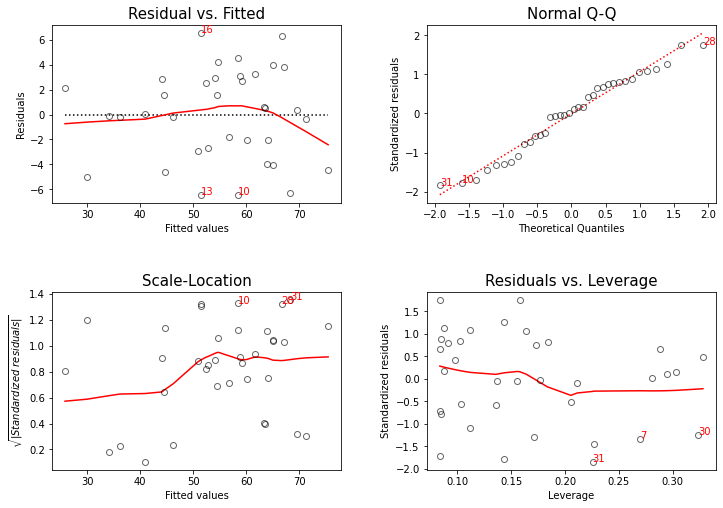

In [67]:
# diagnostic plots
plt.figure(figsize=(10, 7))
lmdiag.plot(reg)

## Try it! Question 4

In [73]:
# leadmoss data
df = pd.read_csv(os.path.join(data_path, 'leadmoss.txt'), delimiter='\t')
df['x2'] = df['x2'].astype('category')

# regression function
reg_func = 'x1 + x2 + x1*x2'

# scatter
fig = px.scatter(df, x='x1', y='Y', width=600, height=400, trendline='ols', color='x2',
                 title='Scatter plot of y vs. x1')
fig.update_traces(patch={'line': {'dash': 'solid'}}, selector={'legendgroup': '0'})
fig.update_traces(patch={'line': {'dash': 'dash'}}, selector={'legendgroup': '1'})
fig.show()

In [74]:
# fit regression
reg = simple_ols(df, x=reg_func, y='Y')

ANOVA
            df       sum_sq    mean_sq         F    PR(>F)
x2         1.0     0.116036   0.116036  0.004406  0.947277
x1         1.0    15.071965  15.071965  0.572326  0.452028
x1:x2      1.0     5.050639   5.050639  0.191787  0.662863
Residual  66.0  1738.082267  26.334580       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2562
Date:                Tue, 19 Oct 2021   Prob (F-statistic):              0.857
Time:                        23:37:07   Log-Likelihood:                -211.75
No. Observations:                  70   AIC:                             431.5
Df Residuals:                      66   BIC:                             440.5
Df Model:                           3                              

# Leaving an Important Interaction Out of a Model


# Piecewise Linear Regression Models

The bug of theme simple white is still here. If using add_vline without the extra paramters, the line won't show up.

Notice the kink at 250!

In [80]:
# shipment dataset
df = pd.read_csv(os.path.join(data_path, 'shipment.txt'), delimiter='\t')

# scatter plot
fig = px.scatter(df, x='x1', y='y', width=600, height=400,
                 title='Scatterplot of y vs. x1')
fig.add_vline(x=250, opacity=1, line_width=2, line_color='red')
fig.show()

In [86]:
# define dummy x2
df['x2_star'] = [1*(x-250) if x > 250 else 0 for x in df['x1']]

# regression function
reg_func = 'x1 + x2_star'

# run regression
reg = simple_ols(df, x=reg_func, y='y')

ANOVA
           df     sum_sq    mean_sq            F        PR(>F)
x1        1.0  48.888039  48.888039  5648.989961  1.941798e-11
x2_star   1.0   1.960391   1.960391   226.522294  1.373262e-06
Residual  7.0   0.060580   0.008654          NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2938.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           5.81e-11
Time:                        00:12:48   Log-Likelihood:                 11.342
No. Observations:                  10   AIC:                            -16.68
Df Residuals:                       7   BIC:                            -15.78
Df Model:                           2                                         
Covariance Type:            non

Note that x2_star = x1 - 250 for x1 > 250. x2_star = 0 when x1 < 250. Some examples:
1. y_bar|(x = 125) = 3.2139 + 0.0385*(125) = 8.0264
2. y_bar|(x = 250) = 3.2139 + 0.0385*(250) = 12.8389
3. y_bar|(x = 250) = 3.2139 + 0.0385*(250) - 0.0248*(250-250) = 12.8389
4. y_bar|(x = 400) = 3.2139 + 0.0385*(400) - 0.0248*(400-250) = 14.8939


In [ ]:
#todo

# BELOW IS NOT FROM LESSION

In [68]:
# infection dataset
df = pd.read_csv(os.path.join(data_path, 'InfctRskL7.csv'))

# Full model
simple_ols(df, x='Stay + Age + Culture + Xray', y='Infct')

ANOVA
             df      sum_sq    mean_sq          F        PR(>F)
Stay        1.0   58.652327  58.652327  59.970406  6.054142e-12
Age         1.0    1.801352   1.801352   1.841833  1.776190e-01
Culture     1.0   26.952192  26.952192  27.557882  7.895787e-07
Xray        1.0    3.191991   3.191991   3.263724  7.366534e-02
Residual  106.0  103.670245   0.978021        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  Infct   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     23.16
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           9.01e-14
Time:                        23:20:32   Log-Likelihood:                -153.71
No. Observations:                 111   AIC:                             317.4
Df Residuals:                     106   BIC:             

In [69]:
simple_ols(df, x='Stay + Culture', y='Infct')

ANOVA
             df      sum_sq    mean_sq          F        PR(>F)
Stay        1.0   58.652327  58.652327  59.222267  7.074567e-12
Culture     1.0   28.655145  28.655145  28.933594  4.379695e-07
Residual  108.0  106.960636   0.990376        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  Infct   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     44.08
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.01e-14
Time:                        23:20:32   Log-Likelihood:                -155.44
No. Observations:                 111   AIC:                             316.9
Df Residuals:                     108   BIC:                             325.0
Df Model:                           2                                         
Covariance Type:           

In [70]:
from scipy.stats import f
# TODO: REMOVE THESE DATASET AND PREDICTIONS. THIS IS IN HW
f.isf()

TypeError: isf() missing 1 required positional argument: 'q'

In [ ]:
# salary dataset
df = pd.read_csv(os.path.join(data_path, 'Salary.csv'))
# df.head()
simple_ols(df, x='YrsExp', y='Salary')

In [ ]:
# Salary vs YrsExp, Deg1 and Deg2
simple_ols(df, x='YrsExp + Deg1 + Deg2', y='Salary')

In [ ]:
simple_ols(df, x='YrsExp + Deg1 + Deg3', y='Salary')

In [ ]:
df.head(10)

In [ ]:
fig = px.scatter(df, x='YrsExp', y='Salary', color='Degree', trendline='ols')
fig.show()